In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import username, password
engine = create_engine(f"postgresql+psycopg2://{username}:{password}@/Employee")
connection = engine.connect()

In [4]:
conn = engine.connect() 
data = pd.read_sql('select * from "Salaries"', conn) 
data.head() 

,emp_no,salary
0,10001,60117.0
1,10002,65828.0
2,10003,40006.0
3,10004,40054.0
4,10005,78228.0


In [5]:
data.count()

emp_no    300024
salary    300024
dtype: int64

In [6]:
data.dtypes

emp_no      int64
salary    float64
dtype: object

In [7]:
data['salary'].value_counts()

40000.0     95346
55581.0        19
53738.0        18
53078.0        18
44564.0        17
            ...  
106308.0        1
80494.0         1
108684.0        1
74935.0         1
90395.0         1
Name: salary, Length: 50355, dtype: int64

In [8]:
max_min_salaries = pd.read_sql('select max(salary) as max_salary, min(salary) as min_salary from "Salaries"', conn) 
max_salary = max_min_salaries['max_salary'].item()
min_salary = max_min_salaries['min_salary'].item()
print(f'The minimum salary is: {min_salary}')
print(f'The maximum salary is: {max_salary}')

The minimum salary is: 40000.0
The maximum salary is: 129492.0


In [9]:
data['salary'].describe()

count    300024.000000
mean      52970.732451
std       14301.478491
min       40000.000000
25%       40000.000000
50%       48681.000000
75%       61758.000000
max      129492.000000
Name: salary, dtype: float64

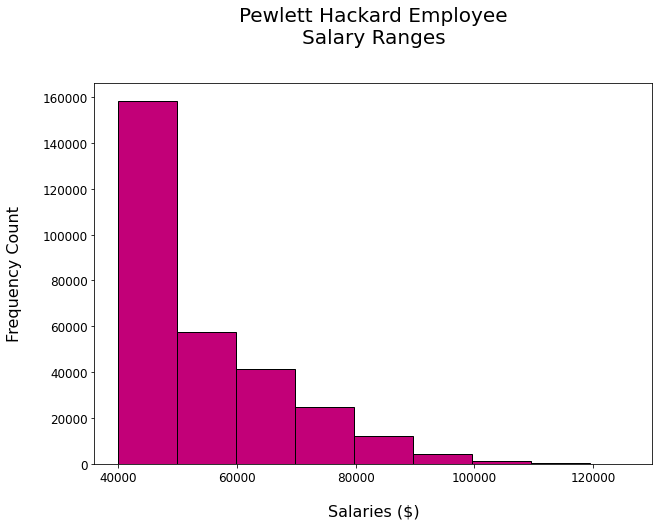

<Figure size 720x504 with 0 Axes>

In [24]:
plt.rcParams['figure.figsize']=(10,7)
plt.hist(data['salary'],bins=9,color='xkcd:magenta',alpha=1,edgecolor='black')
plt.title('Pewlett Hackard Employee\nSalary Ranges',fontsize=20,pad=40)
plt.xlabel('Salaries ($)',fontsize=16,color='black',labelpad=20)
plt.ylabel('Frequency Count',fontsize=16,color='black',labelpad=20)
plt.xlim(36000,130000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

s_mean=data['salary'].mean()
s_max=data['salary'].max()
s_min=data['salary'].min()

plt.savefig("./Images/employee_salary_ranges.png")

plt.show()

In [11]:
title_data = pd.read_sql('select * from "Titles"', conn)
title_data.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [12]:
new_title_data = title_data.rename(columns={'title_id':'emp_title' })
new_title_data.head()

,emp_title,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [13]:
employee_data = pd.read_sql('select * from "Employees"', conn)
employee_data.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991


In [14]:
dept_manager_data = pd.read_sql('select * from "Dept_Manager"', conn)
dept_manager_data.head()

,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183


In [15]:
#joining data from employees and salarie shere

employee_salary = pd.merge(data, employee_data, on='emp_no', how="inner")
employee_salary.head()

,emp_no,salary,emp_title,birth_date,first_name,last_name,sex,hire_date
0,10001,60117.0,e0003,9/2/1953,Georgi,Facello,M,6/26/1986
1,10002,65828.0,s0001,6/2/1964,Bezalel,Simmel,F,11/21/1985
2,10003,40006.0,e0003,12/3/1959,Parto,Bamford,M,8/28/1986
3,10004,40054.0,e0003,5/1/1954,Chirstian,Koblick,M,12/1/1986
4,10005,78228.0,s0001,1/21/1955,Kyoichi,Maliniak,M,9/12/1989


In [16]:
employee_salary_title = pd.merge(employee_salary, new_title_data, on="emp_title", how="inner")
employee_salary_title.head()

,emp_no,salary,emp_title,birth_date,first_name,last_name,sex,hire_date,title
0,10001,60117.0,e0003,9/2/1953,Georgi,Facello,M,6/26/1986,Senior Engineer
1,10003,40006.0,e0003,12/3/1959,Parto,Bamford,M,8/28/1986,Senior Engineer
2,10004,40054.0,e0003,5/1/1954,Chirstian,Koblick,M,12/1/1986,Senior Engineer
3,10006,40000.0,e0003,4/20/1953,Anneke,Preusig,F,6/2/1989,Senior Engineer
4,10009,60929.0,e0003,4/19/1952,Sumant,Peac,F,2/18/1985,Senior Engineer


In [17]:
#dropping unnecessary columns
clean_employee_salary_title = employee_salary_title.drop(columns=["birth_date","hire_date","sex","last_name","first_name","emp_no"])
clean_employee_salary_title.head()

,salary,emp_title,title
0,60117.0,e0003,Senior Engineer
1,40006.0,e0003,Senior Engineer
2,40054.0,e0003,Senior Engineer
3,40000.0,e0003,Senior Engineer
4,60929.0,e0003,Senior Engineer


In [18]:
grouped_df = employee_salary_title.groupby("title").mean()
grouped_df

,emp_no,salary
title,,
Assistant Engineer,252992.595373,48564.434447
Engineer,253654.345919,48535.336511
Manager,110780.833333,51531.041667
Senior Engineer,253038.749885,48506.799871
Senior Staff,254481.798969,58550.172704
Staff,253408.503604,58465.382850
Technique Leader,251811.432730,48582.896092


In [19]:
#dropping emp_no
clean_groupd_df = grouped_df.drop(columns=["emp_no"])
clean_groupd_df = clean_groupd_df.reset_index()
clean_groupd_df

,title,salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


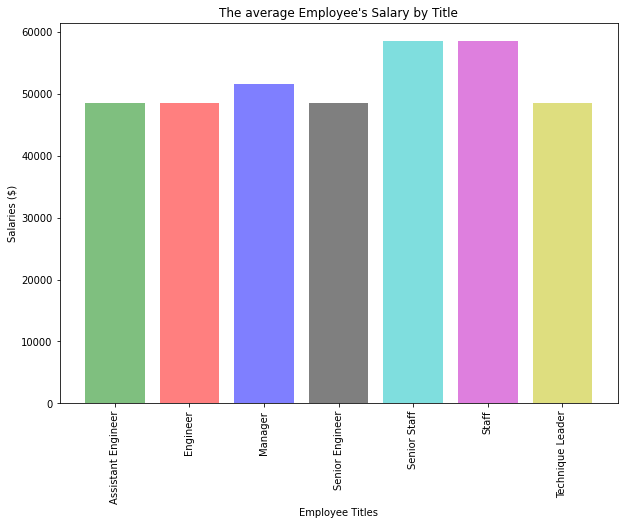

In [21]:
x_axis = clean_groupd_df["title"]
ticks = np.arange(len(x_axis))
y_axis = clean_groupd_df["salary"]

plt.bar(x_axis,y_axis, align="center", alpha=0.5, color=["g","r","b","k","c","m","y"])

plt.xticks(ticks,x_axis, rotation = "vertical")

plt.ylabel("Salaries ($)")
plt.xlabel("Employee Titles")
plt.title("The average Employee's Salary by Title")

plt.savefig("./Images/average_salary_by_title.png")

plt.show()

In [22]:
#The Epilogue
id = employee_salary_title[employee_salary_title['emp_no'] == 499942]
my_data=id[['emp_no','title','first_name','last_name','salary','hire_date']]
my_data
my_data.columns=['emp_no','title','first_name','last_name','salary ($)','hire_date']
my_data

,emp_no,title,first_name,last_name,salary ($),hire_date
299999,499942,Technique Leader,April,Foolsday,40000.0,2/10/1997
